No null values found in the GTZAN dataset.


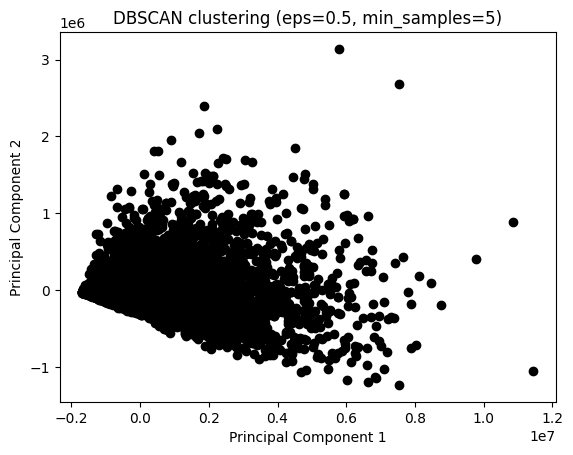

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

df = pd.read_csv('dataset.csv')

null_= df.isnull().sum().sum()

if null_ == 0:
    print("No null values found in the GTZAN dataset.")
else:
    print(f"{null_} null values found in the GTZAN dataset.")
    
X = df.iloc[:, 1:-1].astype(float).values  # features as float
y = df.iloc[:, -1].values   # Labels

# PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# DBSCAN clustering
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_pca)

# Plot the clusters
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
color_map = dict(zip(unique_labels, colors))

for label in unique_labels:
    if label == -1:
        color = 'black'  # noise points are black
    else:
        color = color_map[label]
    mask = labels == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'DBSCAN clustering (eps={eps}, min_samples={min_samples})')
plt.show()
